


1. Linear Equations
2. Non Linear equations
3. Prediction of Y value using different functions
4. Logistic regression 
5. Derivatives 
6. Gradient Descent Prediction curve animation 
7. Gradient Descent animation
8. Finding Derivatives of some cost functions and activation functions
9. Basic matrix functions
10. Neural Networks and Back Propogation
	1. Back propogation for Networks wiht Bias
	2. Back propogation with using matrices
	3. Back propogation with more than one hidden layer
	4. Back propogation with more than one input and multiple hidden layers layer
	5. Back propogation with more than one input and multiple hidden layers layer and more neurons per hidden layer
    

In progress
        1. backpropogation using batchnormalization
        2. Back propogation while using dropout
        3. Backpropgation using CNN
        4. Backpropgation using RNN/LSTM/sequence models.

http://cs231n.github.io/optimization-2/

### 1. Linear Equations

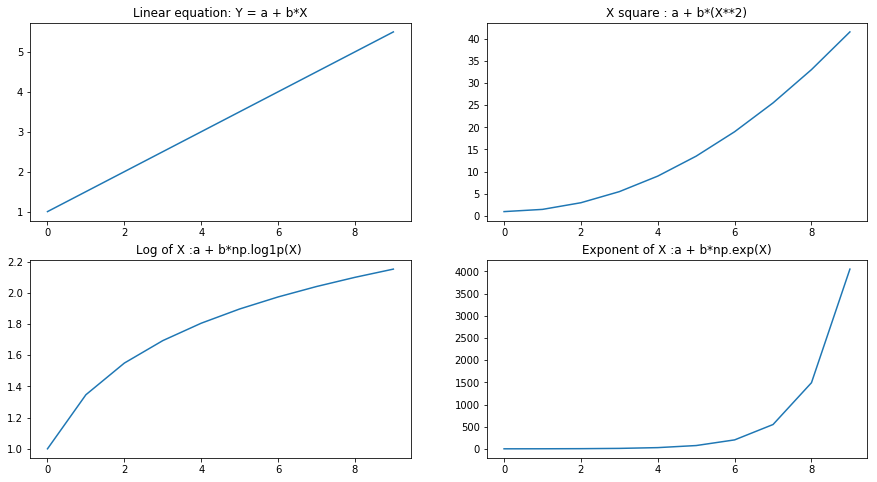

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Cost/Error 
#Linear regression formula 
a = 1 # Y Intercept
X = np.arange(10) # independent variable
b = 0.5 # slope of the line or coffecient or weights


#Find the dependent variable Y  and the linear formula is 
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
Y = a + b*X
plt.plot(X,Y)
plt.title("Linear equation: Y = a + b*X")

#Find the dependent variable Y  and the linear formula is 
plt.subplot(2,2,2)
Y = a + b*(X**2)
plt.plot(X,Y)
plt.title("X square : a + b*(X**2)")

#Find the dependent variable Y  and the linear formula is 
plt.subplot(2,2,3)
Y = a + b*np.log1p(X)
plt.plot(X,Y)
plt.title("Log of X :a + b*np.log1p(X) ")

#Find the dependent variable Y  and the linear formula is 
plt.subplot(2,2,4)
Y = a + b*np.exp(X)
plt.plot(X,Y)
plt.title("Exponent of X :a + b*np.exp(X)")
plt.show()


### Non Linear equations

#### Refere this link for difference between Linear and Non Linear equations : 

http://blog.minitab.com/blog/adventures-in-statistics-2/what-is-the-difference-between-linear-and-nonlinear-equations-in-regression-analysis

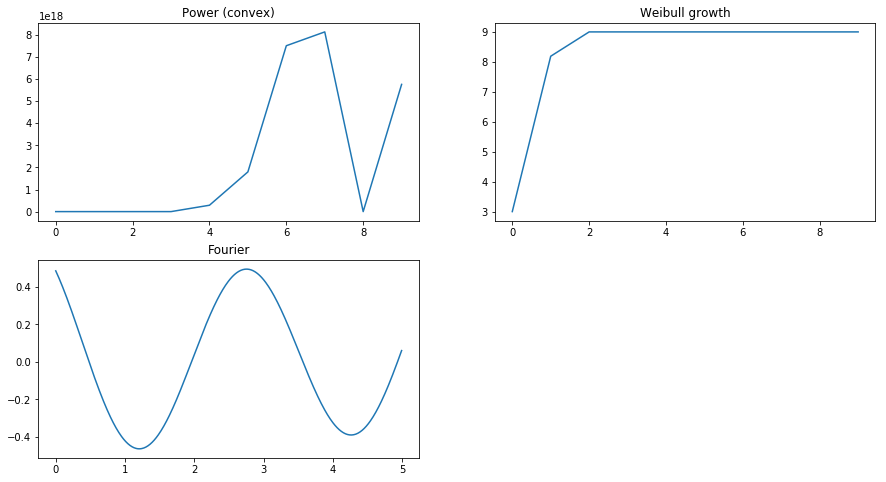

In [13]:
#Non linear regression
#Power (convex): Theta1 * X^Theta2
X= np.arange(10)
Theta1 = np.random.randint(1,10)
Theta2 = np.random.randint(1,100)
Y = Theta1 * (X**Theta2)
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.plot(X,Y)
plt.title("Power (convex)")


#Weibull growth: Theta1 + (Theta2 - Theta1) * exp(-Theta3 * X^Theta4)
X= np.arange(10)
Theta1 = np.random.randint(1,10)
Theta2 = np.random.randint(1,10)
Theta3 = np.random.randint(1,10)
Theta4 = np.random.randint(1,10)
Y = Theta1 + (Theta2 - Theta1) * np.exp(-Theta3 * (X**Theta4))
plt.subplot(2,2,2)
plt.plot(X,Y)
plt.title("Weibull growth")


#Fourier: Theta1 * cos(X + Theta4) + (Theta2 * cos(2*X + Theta4) + Theta3
X= np.arange(0,5,0.01)
Theta1 = np.random.rand(1)
Theta2 = np.random.rand(1)
Theta3 = np.random.rand(1)
Theta4 = np.random.rand(1)
Y = Theta1 * np.cos(X + Theta4) + (Theta2 * np.cos(2*X + Theta4) + Theta3)
plt.subplot(2,2,3)
plt.plot(X,Y)
plt.title("Fourier")
plt.show()


### Prediction of Y value using different functions

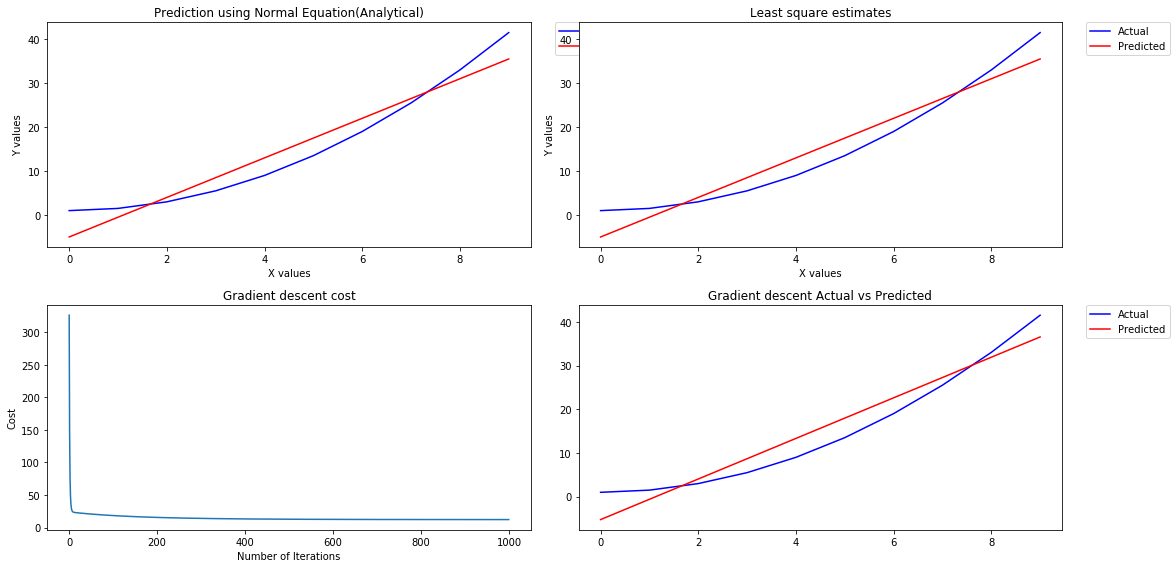

In [16]:
a = 1 # Y Intercept
X = np.arange(10) # independent variable
b = 0.5 # slope of the line or coffecient or weights
Y = a + b*(X**2)

#one way to find b0, b1 . ( a,b) are using analytial solution
X = X.reshape(-1,1)
Xt = np.hstack([np.ones((len(X),1)),X]) # Adding bias as 1
Y = Y.reshape(-1,1)
theta_best = np.dot(np.linalg.inv(np.dot(Xt.T,Xt)),np.dot(Xt.T , Y)) # (Inverse(X.T * X) * X.T * Y)
y_predict = Xt.dot(theta_best)

# X_new = X
# X_new_b = np.c_[np.ones((len(X_new), 1)), X_new]  # add x0 = 1 to each instance
# y_predict = X_new_b.dot(theta_best)

plt.figure(figsize=(15,8))
plt.subplot(221)
plt.plot(X,Y,color = 'Blue',label="Actual")
plt.plot(X,y_predict ,color = 'Red',label="Predicted")
plt.title("Prediction using Normal Equation(Analytical)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



#Least square estimates
b0=0
b1=0
b1 = np.sum((X - np.mean(X))* (Y - np.mean(Y)))/np.sum((X - np.mean(X))**2)
b0 = np.mean(Y) - b1*np.mean(X)
Y_pred = b0+b1*X
plt.subplot(222)
plt.plot(X,Y,color = 'Blue',label="Actual")
plt.plot(X,Y_pred,color = 'Red',label="Predicted")
plt.title("Least square estimates")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#####  gradient descent 

def cost(x,y,t):
    m = len(x)
    return np.sum((np.dot(x,t) - y)**2)/(m)
def derv(x,y,t):
    return 2*(np.sum(np.dot(x,t) - y))/m

#hyper parameters
theta=np.zeros((2,1))
X_b = np.c_[np.ones((len(X), 1)), X]  #Bias addition
lr = 0.01
epoch= 1000
m = len(X_b)
J =[]

for i in range (epoch):
#     t = theta
    for j in range(len(X_b)):        
        dr = derv(X_b[j],Y[j],theta)
        theta[0] = theta[0]-(lr * dr )
        theta[1] = theta[1]-(lr * dr )*X_b[j,1]
    J.append(cost(X_b[j],Y[j],theta))

plt.subplot(223)
plt.plot(J)
plt.title("Cost")
plt.title("Gradient descent cost")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")


plt.subplot(224)
y_predict = X_b.dot(theta)
plt.plot(X,Y,color = 'Blue',label="Actual")
plt.plot(X,y_predict,color = 'Red',label="Predicted")
plt.title("Gradient descent Actual vs Predicted")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()    

### Logistic regression 
Reference https://www.medcalc.org/manual/logistic_regression.php

### Derivatives 
1. Derivaties are used to find the change in x with respect to given y
2. Derivatives common principles
Reference https://www.derivative-calculator.net

derivative function :dy/dx = d(fy)/dx

Derivative principles
1. derivative of any constant is 0
2. derivative of same values dx/dx = 1
3. xy derivative would be d(x)*y = 1 * y
4. x+y derivative would be d(x)+ d(y) = 1
5. Chain rule :
    d(cost)/dx == dcost/d(output) * d(output)/dx
6. F(x) = a^2 ; df(x)/dx = 2a
7. F(x) = a^3 ; df(x)/dx = 3a^2
8. F(x) = log(a) ; df(x)/dx = 1/a


### Gradient Descent Prediction curve animation 

In [17]:
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation



#gradient descent 
def cost(x,y,t):
    m = len(x)
    return np.sum((np.dot(x,t) - y)**2)/(m)
def derv(x,y,t):
    return 2*(np.sum(np.dot(x,t) - y))/m

a = 1 # Y Intercept
X = np.arange(1,20) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X**2)

theta=np.zeros((2,1))
X_b = np.c_[np.ones((len(X), 1)), X] 
lr = 0.001
epoch= 1000
m = len(X_b)
J =[]



def call_epoch():
#     for j in range(len(X_b)):        
#         dr = derv(X_b[j],Y[j],theta)
#         theta[0] = theta[0]-(lr * dr )
#         theta[1] = theta[1]-(lr * dr )*X_b[j,1]

    for i in range (2):
        for j in range(len(X_b)):        
            dr = derv(X_b[j],Y[j],theta)
            theta[0] = theta[0]-(lr * dr )
            theta[1] = theta[1]-(lr * dr )*X_b[j,1]
        J.append(cost(X_b[j],Y[j],theta))
    new_Y = np.dot(X_b,theta)
    return new_Y 
    


fig, ax = plt.subplots()

ax.scatter(X,Y,)
l, = ax.plot(X,np.dot(X_b,theta),color='r')

animate = lambda i: l.set_data(X, call_epoch())
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100,interval=20)#interval is delay between frames in milliseconds
plt.close()
ani




    

### Gradient plot

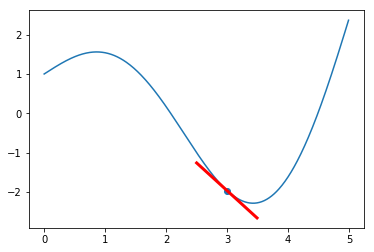

None
-1.413352520780047


In [13]:
import numpy as np
import matplotlib.pyplot as plt
#Fourier: Theta1 * cos(X + Theta4) + (Theta2 * cos(2*X + Theta4) + Theta3
X= np.arange(0,5,0.01)
Y = X * np.cos(X)+1
plt.plot(X,Y)

def derivative_point(point):
    range =50
    if point < range : point = range
    if point+range > len(Y): point = len(Y) - range
    #derivative of function X * np.cos(X)+1
    Y_pred = np.cos(X) - X*np.sin(X) 
    X_slide =X[point-range:point+range]
    b0= (Y[point]-(X_slide[range]*Y_pred[point]))
    b1= Y_pred[point]

    X_dslope=  b0+ X_slide*b1

    # X_dslope = X_dslope-(X_dslope[50]-Y[point]) // used for getting bias after calculating x_dslope without bias

    plt.plot(X_slide,X_dslope,color='red',lw=3)
    plt.scatter(X[point],Y[point])
    plt.ylim=(np.min(Y),np.max(Y))
    print(plt.show())
    print(b1)

# ################
# fig, ax = plt.subplots()
# ax.scatter(X,Y,)
# l, = ax.plot(X,np.dot(X_b,theta),color='r')
# animate = lambda i: l.set_data(X, call())
# ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100,interval=20)#interval is delay between frames in milliseconds
# plt.close()
# ani



derivative_point(300)

### Finding Derivatives of some cost functions and activation functions
reference : http://derivative-calculator.net

RELU =max(0,x)  # All positive will have derivatie 1 and negative will have derivative 0 ref #http://kawahara.ca/what-is-the-derivative-of-relu/

Sigmoid = 1/1+exp(-z)  ;  Derivative(Sigmoid) = 1*(1-z)

softmax = exp(x[i])/sum(exp(x)) ; Derivate(softma) = 

for the purposes of derivation, the backpropagation algorithm will concern itself with only one input-output pair. Once this is derived, the general form for all input-output pairs in  can be generated by combining the individual gradients. Thus, the error function in question for derivation 

Error = (ypred-y)**2/2 ; Derivate(Error) = (ypred - y)

log = log(x) ;Derivative(log) = 1 / x ( x>0 or x !=0)

tanh = tanh(x)



### Basic matrix functions
1. Matrix multiplication
2. Matrix Transpose
3. Matrix inverse
4. Matrix Broadcasting
5. Matrix tiling/stacking
6. Matrix new Axis addition




### Neural Networks and Back Propogation

1. One parameter
2. one target(Y) value
3. One hidden layer
4. one Hidden Node

[[1.92230604]
 [1.92921746]]


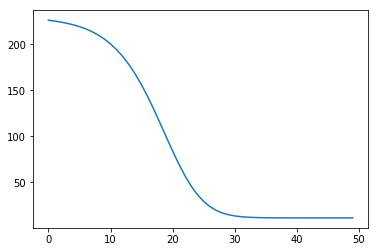

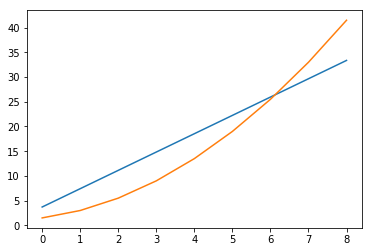

In [1860]:
## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu
#activation function at output layer will be 

a = 1 # Y Intercept
X = np.arange(1,10) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X**2)#Find the dependent variable Y  and the linear formula is 
lr = 0.001
epoch = 50
hidden_layer_activation = 1




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta= np.random.random((2,1))

#Hidden layer input(input parameter * theta1 ) and output(activation function)
def forward(x,theta):
    h1_input = x*theta[0]
    h1_output = max(0,h1_input) # RELU activation
    Output = h1_output * theta[1]
    return Output

def cost(Output,y):
    #check how much the error is , we use this value to find the derivative
    return np.sum((y-Output)**2)/(len(y)*2)

    
def dvalue(x,fx):
    pass
    
costl = []
OD_history =[]
HO_D_history =[]
HI_D_history = []

ThetaD = np.zeros((len(X),2))
for j in range(epoch):
    Y_pred = np.zeros(len(X))
    for i in range(len(X)):
        Y_pred[i]=forward(X[i],theta)
        h1_input = X[i] * theta[0]
        h1_output =  max(0,h1_input)

        #Back propogation
        #Partial Derivative of output with respect to cost and Average the derivates
        OD = (Y_pred[i] - Y[i])
        HO_D = theta[1] * OD
        HI_D = (1 if h1_input > 0 else 0) * HO_D 
        
        ThetaD[i,1] = h1_output * OD
        ThetaD[i,0] =X[i] * HI_D

    theta[0] += -lr * np.average(ThetaD,axis = 0)[0]
    theta[1] += -lr * np.average(ThetaD,axis = 0)[1]
    costl.append(cost(Y_pred,Y))

    """
    OD = d(C)/d(O)
    
    HO_D = d(C)/d(H_output)  
         == d(O)/d(H_ouput) * d(C)/d(O) 
         == d(O)/d(H_ouput) * OD
         
    HI_D = d(C)/d(H_input) 
         == d(H_output)/d(H_input)* d(O)/d(H_output) * d(C)/d(O)
         == d(H_output)/d(H_input) * HO_D
         
    Theta1D = d(C)/dTheta1 
            == d(O)/dTheta1 * d(C)/d(O)
            == d(O)/dTheta1 * OD
            
    Theata0D = d(C) /dTheta1 
             == d(H_Input)/dTheta0 * d(H_output)/d(H_input)* d(O)/d(H_output) * d(C)/d(O)
             == 
    """
    
print(theta)
import matplotlib.pyplot as plt
plt.plot(costl)
plt.show()

costl[-1]

plt.plot(Y_pred)
plt.plot(Y)
plt.show()

#### Back propogation for Networks wiht Bias

1. One parameter
2. one target(Y) value
3. One hidden layer
4. one Hidden Node
5. With Bias addition

[[1.76451214]
 [1.81843069]]


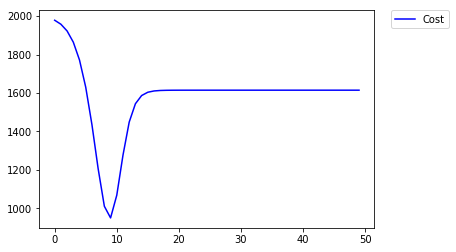

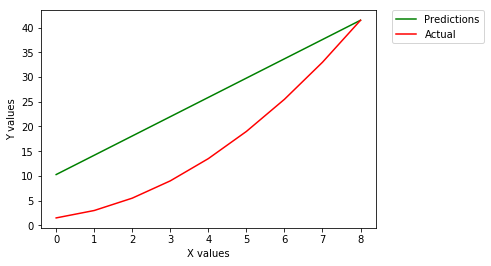

In [1960]:

## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu


a = 1 # Y Intercept
X = np.arange(1,10).reshape(-1,1) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X**2)#Find the dependent variable Y  and the linear formula is 
lr = 0.001
epoch = 50
hidden_layer_neurons = 1




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta1= np.random.random((X.shape[1]+1,1))
theta2= np.random.random((hidden_layer_neurons+1,1))

# theta1= np.random.uniform(0.1,1,(X.shape[1]+1,1))
# theta2= np.random.uniform(0.1,1,(hidden_layer_neurons+1,1))

#Hidden layer input(input parameter * theta1 ) and output(activation function)
def forward(x,theta1,theta2):
    x = np.array([1,x]).reshape(1,-1)
    h1_input = np.dot(x,theta1)
    h1_output = np.maximum(0,h1_input) # RELU activation
    h1_output = np.array([1,h1_output])
    Output = np.dot(h1_output , theta2)
    return Output

def cost(Output,y):
    #check how much the error is , we use this value to find the derivative
    return np.sum((y-Output)**2)/(len(y)*2)

costl = []
Theta1D = np.zeros((len(X),2))
Theta2D = np.zeros((len(X),2))


for j in range(epoch):
    Y_pred = np.zeros(len(X))
    for i in range(len(X)):
        Y_pred[i]=forward(X[i],theta1,theta2)
        
        x = np.array([1,X[i]]).reshape(1,-1)
        h1_input = np.dot(x,theta1)
        h1_output = np.maximum(0,h1_input) # RELU activation
        h1_output = np.array([1,h1_output])


        #Back propogation
        #Partial Derivative of output with respect to cost and Average the derivates
        OD = (Y_pred[i] - Y[i])
        HO_D = theta2 * OD
        HI_D = np.dot((1 if h1_input > 0 else 0),HO_D )
        
        Theta1D = h1_output * OD
        Theta2D  = np.dot(x, HI_D)

    theta1 += -lr * np.average(Theta1D,axis = 0)
    theta2 += -lr * np.average(Theta2D,axis = 0)
    costl.append(cost(Y_pred,Y))
    
print(theta1)
import matplotlib.pyplot as plt
plt.plot(costl,color='Blue',label='Cost')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

costl[-1]

plt.plot(Y_pred,color='Green',label='Predictions')
plt.plot(Y,color='red',label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Back propogation with using matrices

1. One parameter
2. one target(Y) value
3. One hidden layer
4. one Hidden Node
5. With Bias addition
6. calculations using matrices

[[-3.98816269]
 [ 6.11781059]]


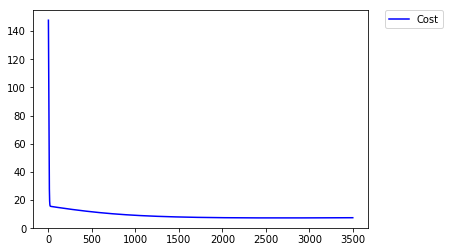

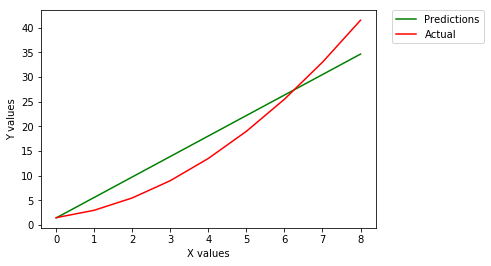

In [2006]:
## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu


a = 1 # Y Intercept
X = np.arange(1,10).reshape(-1,1) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X**2)#Find the dependent variable Y  and the linear formula is 
lr = 0.001
epoch = 3500
hidden_layer_neurons = 1




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta1= np.random.random((X.shape[1]+1,1))
theta2= np.random.random((hidden_layer_neurons+1,1))

# theta1= np.random.uniform(0.1,1,(X.shape[1]+1,1))
# theta2= np.random.uniform(0.1,1,(hidden_layer_neurons+1,1))




costl = []
Theta1D = np.zeros((len(X),2))
Theta2D = np.zeros((len(X),2))


for j in range(epoch):
    #Forward
    input_data = np.hstack((np.ones((X.shape[0],1)),X))
    h1_input = np.dot(input_data,theta1)
    h1_output = np.maximum(0,h1_input) # RELU activation
    h1_output = np.hstack((np.ones((X.shape[0],1)),h1_output))
    Y_pred = np.dot(h1_output , theta2)

    #check how much the error is , we use this value to find the derivative
    costl.append(np.sum((Y-Y_pred)**2)/(len(Y)*2))


    #Back propogation
    #Partial Derivative of output with respect to cost and Average the derivates
    OD = (Y_pred - Y)
    HO_D = OD * theta2.T
    HI_D = np.array([0 if x <=0 else 1 for x in h1_input]).reshape(-1,1)
    HI_D = HI_D*HO_D

    Theta1D = h1_output * OD
    Theta2D  = input_data * HI_D

    theta1 += -lr * np.average(Theta1D,axis = 0).reshape(theta1.shape)
    theta2 += -lr * np.average(Theta2D,axis = 0).reshape(theta2.shape)
 
    
print(theta1)
import matplotlib.pyplot as plt
plt.plot(costl,color='Blue',label='Cost')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

costl[-1]

plt.plot(Y_pred,color='Green',label='Predictions')
plt.plot(Y,color='red',label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Back propogation with more than one hidden layer

1. One parameter
2. one target(Y) value
3. two hidden layers
4. one Hidden Node
5. With Bias addition
6. calculations using matrices

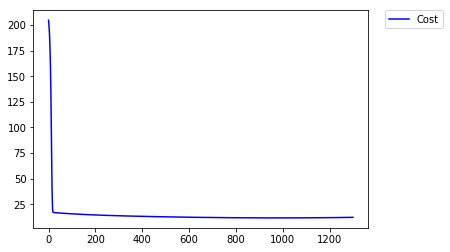

final cost : 12.219175576620442


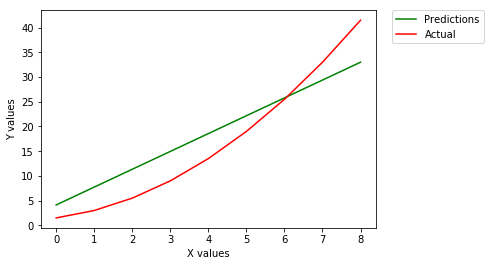

In [2032]:
## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu


a = 1 # Y Intercept
X = np.arange(1,10).reshape(-1,1) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X**2)#Find the dependent variable Y  and the linear formula is 
lr = 0.001
epoch = 1300
hidden_layer_neurons = 1




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta1= np.random.random((X.shape[1]+1,1))
theta2= np.random.random((hidden_layer_neurons+1,1))
theta3= np.random.random((hidden_layer_neurons+1,1))

costl = []
Theta1D = np.zeros(theta1.shape)
Theta2D = np.zeros(theta2.shape)
Theta3D = np.zeros(theta3.shape)


for j in range(epoch):
    #Forward
    input_data = np.hstack((np.ones((X.shape[0],1)),X))
    h1_input = np.dot(input_data,theta1)
    h1_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h1_input))) # RELU activation
    h2_input = np.dot(h1_output, theta2)
    h2_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h2_input))) # RELU activation
    Y_pred = np.dot(h2_output , theta3)

    #check how much the error is , we use this value to find the derivative
    costl.append(np.sum((Y-Y_pred)**2)/(len(Y)*2))


    #Back propogation
    #Partial Derivative of output with respect to cost and Average the derivates
    OD = (Y_pred - Y)
    H2O_D = OD * theta3.T
    H2I_D = (np.array([0 if x <=0 else 1 for x in h2_input]).reshape(-1,1)) *H2O_D
    
    H1O_D = H2I_D * theta2.T
    H1I_D = (np.array([0 if x <=0 else 1 for x in h1_input]).reshape(-1,1)) * H1O_D

    Theta3D = h2_output * OD
    Theta2D = h1_output * H2I_D
    Theta1D = input_data * H1I_D



    theta1 += -lr * np.average(Theta1D,axis = 0).reshape(theta1.shape)
    theta2 += -lr * np.average(Theta2D,axis = 0).reshape(theta2.shape)
    theta3 += -lr * np.average(Theta3D,axis = 0).reshape(theta3.shape)
    

import matplotlib.pyplot as plt
plt.plot(costl,color='Blue',label='Cost')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

print("final cost :",costl[-1])

plt.plot(Y_pred,color='Green',label='Predictions')
plt.plot(Y,color='red',label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Back propogation with more than one input and multiple hidden layers layer

1. Two parameter
2. one target(Y) value
3. two hidden layers
4. one Hidden Node
5. With Bias addition
6. calculations using matrices

/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:53: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/DS/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


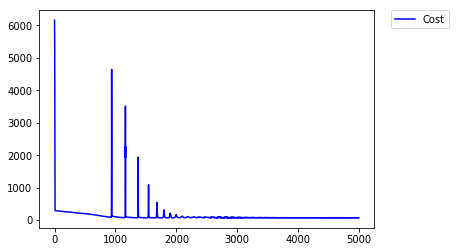

Final Cost:  73.3551450641919


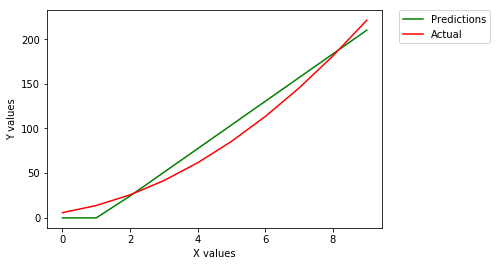

In [2356]:
## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu


a = 1 # Y Intercept
X = np.arange(1,21).reshape(-1,2) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X[:,0]**2) + 2*X[:,1] #Find the dependent variable Y  and the linear formula is 
Y = np.array(Y).reshape(-1,1)
lr = 0.0001
epoch = 5000
hidden_layer_neurons = 1




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta1= np.random.random((X.shape[1]+1,1))
theta2= np.random.random((hidden_layer_neurons+1,1))
theta3= np.random.random((hidden_layer_neurons+1,1))

costl = []
Theta1D = np.zeros(theta1.shape)
Theta2D = np.zeros(theta2.shape)
Theta3D = np.zeros(theta3.shape)


for j in range(epoch):
    #Forward
    input_data = np.hstack((np.ones((X.shape[0],1)),X))
    h1_input = np.dot(input_data,theta1)
    h1_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h1_input))) # RELU activation
    h2_input = np.dot(h1_output, theta2)
    h2_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h2_input))) # RELU activation
    Y_pred = np.dot(h2_output , theta3)

    #check how much the error is , we use this value to find the derivative
    costl.append(np.sum((Y-Y_pred)**2)/(len(Y)*2))
        
    if (costl[-1]) >= 0:
        pass
    else:
        break



    #Back propogation
    #Partial Derivative of output with respect to cost and Average the derivates
    OD = (Y_pred - Y)
    H2O_D = OD * theta3.T[:,1:]
    H2I_D = (np.array([0 if x <=0 else 1 for x in h2_input[:,1:]]).reshape(-1,1)) * H2O_D
    
    H1O_D = H2I_D * theta2.T[:,1:]
    H1I_D = (np.array([0 if x <=0 else 1 for x in h1_input[:,1:]]).reshape(-1,1)) * H1O_D
    

#     Theta1D = input_data * H1O_D
#     Theta2D = h1_output * H2I_D
#     Theta3D = h2_output * OD
    
    Theta1D = input_data[:, :, np.newaxis] * H1O_D[: , np.newaxis, :]
    Theta2D = h1_output[:, :, np.newaxis] * H2I_D[: , np.newaxis, :]
    Theta3D = h2_output * OD


    

    theta1 += -lr * np.average(Theta1D,axis = 0).reshape(theta1.shape)
    theta2 += -lr * np.average(Theta2D,axis = 0).reshape(theta2.shape)
    theta3 += -lr * np.average(Theta3D,axis = 0).reshape(theta3.shape)

import matplotlib.pyplot as plt
plt.plot(costl,color='Blue',label='Cost')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

print("Final Cost: ",costl[-1])

plt.plot(Y_pred,color='Green',label='Predictions')
plt.plot(Y,color='red',label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [2147]:
len(costl)

50000

#### Back propogation with more than one parameter and multiple hidden layers  and more neurons per hidden layer

1. Two parameter
2. one target(Y) value
3. two hidden layers
4. more than 1 Hidden Node
5. With Bias addition
6. calculations using matrices

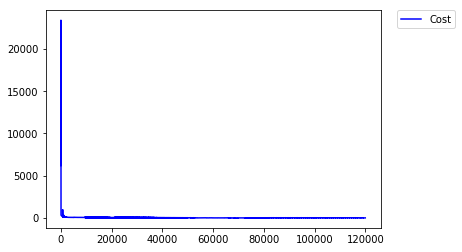

Final Cost:  3.3344655340554206  Length of cost:  120000


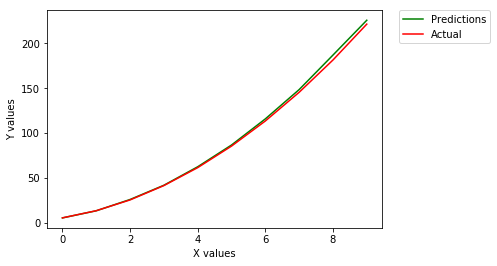

In [2375]:
## linear regression using neural networks
#one parameter(input) one hidden layer and two weights connecting input to hidden and hidden to output.
#activation function in hidden layer will be relu


a = 1 # Y Intercept
X = np.arange(1,21).reshape(-1,2) # independent variable
b = 0.5 # slope of the line or coefficient or weights
Y = a + b*(X[:,0]**2) + 2*X[:,1] #Find the dependent variable Y  and the linear formula is 
Y = np.array(Y).reshape(-1,1)
lr = 0.0001
epoch = 120000
hidden_layer_neurons = 10




#initialize weights of theta , since we have one hidden layer(with one neuron) we will have two thetas
# theta= np.random.uniform(0,.1,(2,1))
theta1= np.random.random((X.shape[1]+1,hidden_layer_neurons))
theta2= np.random.random((hidden_layer_neurons+1,hidden_layer_neurons))
theta3= np.random.random((hidden_layer_neurons+1,Y.shape[1]))

costl = []
for j in range(epoch):
    #Forward
    input_data = np.hstack((np.ones((X.shape[0],1)),X)) # (10,3)
    h1_input = np.dot(input_data,theta1)#(10,5)
    h1_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h1_input))) # RELU activation #(10,6)
    h2_input = np.dot(h1_output, theta2) # (10,5)
    h2_output = np.hstack((np.ones((X.shape[0],1)),np.maximum(0,h2_input))) # RELU activation #(10,6)
    Y_pred = np.dot(h2_output , theta3) #(10,1)

    #check how much the error is , we use this value to find the derivative
    costl.append(np.sum((Y-Y_pred)**2)/(len(Y)*2))
        
    if (costl[-1]) >= 0:
        pass
    else:
        break



    #Back propogation
    #Partial Derivative of output with respect to cost and Average the derivates
    OD = (Y_pred - Y) # (10,1)
    H2O_D = np.dot(OD ,theta3.T[:,1:]) #(10,5)
    H2I_D = ((h2_input>0).astype(np.int16)) * H2O_D #(10,5)
    H1O_D = np.dot(H2I_D ,theta2.T[:,1:]) #(10,5)
    H1I_D = ((h1_input>0).astype(np.int16)) * H1O_D #(10,5)
    


    Theta1D = input_data[:, :, np.newaxis] * H1O_D[: , np.newaxis, :]
    Theta2D = h1_output[:, :, np.newaxis] * H2I_D[: , np.newaxis, :]
    Theta3D = h2_output * OD
    

    theta1 += -lr * np.average(Theta1D,axis = 0).reshape(theta1.shape)
    theta2 += -lr * np.average(Theta2D,axis = 0).reshape(theta2.shape)
    theta3 += -lr * np.average(Theta3D,axis = 0).reshape(theta3.shape)

import matplotlib.pyplot as plt
plt.plot(costl,color='Blue',label='Cost')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()

print("Final Cost: ",costl[-1], " Length of cost: ", len(costl))

plt.plot(Y_pred,color='Green',label='Predictions')
plt.plot(Y,color='red',label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()